# ***Machine Learning Prueba 2 - Analizando los crímenes en la Ciudad de Nueva York***.
### Nombre(s): Thomas Peet, Braulio Águila, Camilo Ramírez
### Generación: G47
### Profesores: Alfonso Tobar - Sebastián Ulloa
### Fecha: 06-10-2022

### *Contexto*
En esta ocasión trabajaremos con datos públicos del departamento de policía de New York.    
El dataset es llamado stop_and_frisk_data y contiene información sobre interrogaciones    
y detenciones realizadas por el departamento de policía de NY en la vía pública. El    
diccionario de atributos se encuentra en el archivo 2009 SQF File Spec.xls.    
Para todo nuestro estudio utilizaremos los datos correspondientes al año 2009 como    
conjunto de entrenamiento y los datos del 2010 como conjunto de pruebas. Hay que hacer    
notar que los datos que estamos utilizando son un muestreo del de la cantidad de registros    
reales que contiene el dataset, esta decisión fue tomada debido a los largos tiempos de    
entrenamiento y procesamiento que requiere el volumen de datos reales. 

### *Objetivos*
Para alcanzar el objetivo general, su trabajo se puede desagregar en los siguientes puntos:  

1. Debe analizar de forma exploratoria los atributos. Reporte la cantidad de datos    
perdidos y presente su esquema de recodificación. Tenga presente que lo que    
observe en el análisis exploratorio debe guiar su proceso de ingeniería de atributos,    
por lo que se le recomienda que piense en aspectos de las variables involucradas     
que puedan afectar el proceso mencionado.

2. Reporte la probabilidad de que un individuo sea arrestado en uno de los cinco  
barrios, condicional al género y a la raza. Concluya, ¿qué implicancias éticas tienen  
algunas conclusiones de lo que observa?.

3. Entregue un modelo predictivo que prediga efectivamente si un determinado  
procedimiento concluirá en un arresto o no. Para ello, guíate por los siguientes  
lineamientos:  
    - Entrene por lo menos 3 modelos que sean capaces de predecir si se  
producirá un arresto o no. Una vez que encuentre un modelo satisfactorio,  
reporte al menos dos métricas de desempeño.  
    - Refine aquellos atributos relevantes con alguna estrategia que crea  
conveniente y reporte por lo menos 5 atributos relevantes para realizar la  
predicción.

4. Genere al menos cinco modelos predictivos que permitan determinar si el  
procedimiento policial concluirá en alguna acción violenta.  
○ Para ello, debe generar un nuevo atributo como vector objetivo que indique  
cuándo hubo violencia o no. Éste debe ser creado a partir de atributos  
existentes que indiquen el tipo de violencia.
  
5. Seleccione los 2 mejores modelos, serialicelos y envíalos a evaluación. Recuerde que  
el modelo serializado debe ser posterior al fit, para poder ejecutar predict en los  
nuevos datos

>>>#### Tipo de problema a resolver:
- De acuerdo con el enunciado y una revisión preliminar de los datos entregados, ambas problemáticas planteadas,  
el hecho de que ocurra o no un arresto, y de que un procedimiento policial es o no violento, corresponden a   
problemas de **clasificación**, ya que ambas variables objetivos son discretas.

>>>#### Tipo de métricas a implementar:
- Las métricas que se utilizarán para la división de muestras corresponden a :
- Tipo de preprocesamiento: 

>>>#### Modelos (5) con gridsearch e hiperparamétros tentativos/definitivos:
- Modelo 1:
- Modelo 2:
- Modelo 3:
- Modelo 4:
- Modelo 5:

>>>#### Comportamiento de variables objetivo (recodificados):
- Variable objetivo 1: procedimiento policial en el que ocurre o no un arresto ("arstmade")
- Variable objetivo 2: procedimiento policial 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from feature_engine.imputation import CategoricalImputer, MeanMedianImputer
from feature_engine.encoding import OrdinalEncoder, OneHotEncoder
from feature_engine.wrappers import SklearnTransformerWrapper
#from feature engine drop features ----> sacar features para el pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn import set_config
set_config(display='diagram')

from pathlib import Path
# from pandas_profiling import ProfileReport

import geopandas as gpd
import contextily as cx
#import shapely
import folium 
import pyproj
import helpers as hp
import preproc_nyc_sqf as preproc
#import contextily as cx
#pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

## ***Dataset interrogaciones/detenciones Policía de Nueva York - 2009***:

In [ ]:
df2009 = pd.read_csv('2009_1perc.csv', index_col=0)
df2009.head(15)

In [ ]:
#Revisión de registros y features de df1:
df2009.shape #5812 registros y 111 features

In [ ]:
#Se utiliza función entregada para limpieza preliminar de la data, se mantienen los 5812 registros y se crean 3 columnas nuevas.
preproc.create_suitable_dataframe(df2009)

In [ ]:
df2009.officrid.value_counts()

In [ ]:
df2009.head(5)

In [ ]:
df2009.shape

In [ ]:
df2009.premtype.value_counts()

In [ ]:
var_eliminar = ["year", "premtype", "rescode", "aptnum", 
"addrtyp", "state",	"zip", "othfeatr", "comppct", "compyear", "dettypcm", "linecm", "machgun",
                "adtlrept", ]
var_duda = []
var_mant_bin = ["ac_rept", "radio", "pf_other", ""]
var_mant_num = []

>>>#### Exploración variable objetivo 1 ("arstmade")

In [ ]:
df2009.arstmade.value_counts() #oversampling

In [ ]:
#Visualización de el vector objetivo:
sns.histplot(df2009, x="arstmade"); # Categoría uno muchos menos casos que categoría 0.
plt.title("Vector objetivo : arstmade")
plt.xlabel("clases");

>>>#### Exploración variable objetivo 1 ("violencia física en arresto") --- Necesita ser recodificada

In [ ]:
df2009

In [ ]:
#Recodificando variable objetivo 2:

var_pf = df2009.columns[np.where([i[0:2]=='pf' for i in df2009.columns.tolist()])]. tolist()
u = df2009[var_pf]
u["var_pf"] = [np.isin(["Y"], u.iloc[i].values.tolist())[0] for i in range(0,len(u))]
df2009.insert(df2009.shape[1],"var_pf", u["var_pf"])
df2009


In [ ]:
#Revisión de variables, tipo de dato, largo y valores únicos: FALTA INDICAR COMPORTAMIENTO DEL "RATE" PARA DISCRIMINAR ENTRE VARIABLES NÚMERICAS Y CATEGÓRICAS.
# hp.cat_num_rate_analysis(df2009)

In [ ]:
# Hacemos un análisis exploratorio de las variables:
# profile = ProfileReport(df2009, title="Pandas Profiling Report", explorative=True)
# profile.to_notebook_iframe()

In [ ]:
# #Se usa función para retornar nombres de columnas de un tipo de dato en particular (object):
# var_cat = preproc.infer_datatype(df2009, "O")
# df[var_cat]

In [ ]:
# xcoordmask = df1.xcoord==" "
# xcoord_df = df1[xcoordmask]
# xcoord_df

In [ ]:
df2009 = df2009.loc[df2009["xcoord"] != " ", :]
df2009

In [ ]:
# df = gpd.read_file(gpd.datasets.get_path('nybb'))
# df_wm = df.to_crs(epsg=3857)
# ax = df.plot(figsize=(15, 10), alpha=0.5, edgecolor='k')
# #cx.add_basemap(ax, crs=df.crs)

In [ ]:
df2009.arstmade.value_counts()

In [ ]:
ycoord_vac = df2009.ycoord == " "
ycoord_vac.value_counts()

In [ ]:
df2009["xcoord"] = pd.to_numeric(df2009["xcoord"], downcast="float")
df2009["ycoord"] = pd.to_numeric(df2009["ycoord"], downcast="float")

In [ ]:
df2009map = gpd.GeoDataFrame(df2009,geometry=gpd.points_from_xy(df2009.xcoord, df2009.ycoord), crs="EPSG:4326") #crs="EPSG:4326"
df2009


In [ ]:
# # Make an empty map
# n = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

# # add marker one by one on the map
# for i in range(0,len(df2009)):
#    folium.Marker(
#       location=[df2009.iloc[i]['lat'], df2009.iloc[i]['lon']],
#       popup=df2009.iloc[i]['name'],
#       icon=folium.DivIcon(html=f"""<div style="font-family: courier new; color: blue">{df2009.iloc[i]['name']}</div>""")
#    ).add_to(n)

# # Show the map again
# n

In [ ]:
df = gpd.read_file(gpd.datasets.get_path('nybb'))
df_wm = df.to_crs(epsg=3857)
ax = df.plot(figsize=(15, 10), alpha=0.5, edgecolor='k')
print(df.crs)
cx.add_basemap(ax, crs=df.crs)

,bcode,bname,name,namelsad,coords
0,36005,Bronx,Bronx,Bronx County,"[(1008982.0689763854, 272752.87352105475), (10..."
1,36047,Brooklyn,Kings,Kings County,"[(978869.3811487257, 186863.78073992452), (978..."
2,36061,Manhattan,New York,New York County,"[(1007701.4830916664, 258286.8905491272), (100..."
3,36081,Queens,Queens,Queens County,"[(1026830.7728870079, 155435.71005685008), (10..."
4,36085,Staten Island,Richmond,Richmond County,"[(930721.1281812892, 156627.9162643671), (9307..."


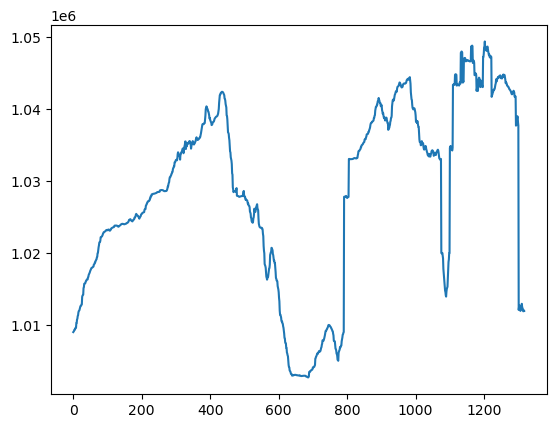

In [127]:
source_crs = 'epsg:2263' # Coordinate system of the file
target_crs = 'epsg:4326' # Global lat-lon coordinate system
polar_to_latlon = pyproj.Transformer.from_crs(source_crs, target_crs, always_xy=True)
def xy_to_latlon(x,y,polar_to_latlon):
    return polar_to_latlon.transform(x, y)

def read_shapefile(shp_path):
	"""
	Read a shapefile into a Pandas dataframe with a 'coords' column holding
	the geometry information. This uses the pyshp package
	"""
	
	import shapefile # pip install pyshp

	#read file, parse out the records and shapes
	sf = shapefile.Reader(shp_path,)
	fields = [x[0] for x in sf.fields][1:]
	records = sf.records()
	shps = [s.points for s in sf.shapes()]
	# display(shps)

	# 'bbox',
	# 'oid',
	# 'parts',
	# 'points',
	# 'shapeType',
	# 'shapeTypeName'
	#write into a dataframe
	df = pd.DataFrame(columns=fields, data=records)
	df = df.assign(coords=shps)

	return df


df_shape_ny = read_shapefile('CHS_2009_DOHMH_2010B/nyu_2451_34490.shp')
# df_shape_ny = read_shapefile('https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycgiszoningfeatures_202208shp.zip')
pd.Series([i[0] for i in df_shape_ny.coords[0]]).plot()
df_shape_ny


In [129]:
#dagshub

from scipy.spatial import ConvexHull
from folium import plugins

f = folium.Figure(width=700, height=400)    
base_map = folium.Map(location=[40.7127837, -74.0059413],control_scale=True, zoom_start=10,tiles='CartoDB positron')
base_map.add_to(f)

colors = ['orange','yellow','red','blue','green']
for point,color in zip(df_shape_ny.coords,colors):
	if color == 'orange' or True:
		lats, longs = xy_to_latlon([i[0] for i in point],[i[1] for i in point], polar_to_latlon)
		positions = [(y, x) for x, y in zip(lats, longs)]
		# points_rev = [(y,x) for x,y in point]
		# points_rev = [points_rev[i] for i in ConvexHull(points_rev).vertices]
		# if color == 'orange':
			# display(positions)
		plugins.PolyLineOffset(locations=positions, color='blue', fill=True, fill_color=color, fill_opacity=0.5, smooth_factor=.1).add_to(base_map)

lats, longs = xy_to_latlon(df2009.xcoord.to_list(), df2009.ycoord.to_list(), polar_to_latlon)
for lat, lon, i in zip(lats, longs, df2009.arstmade):
    color = 'blue' if i == 'Y' else '#FF000030'
    size = '20' if i == 'Y' else '10'
    border = 'none' if i == 'Y' else 'none'
    folium.Marker(location=[str(lon), str(lat)], icon=folium.DivIcon(html=f"<span style='font-size:{size}px;color:{color};border:{border}'>&#9670;</span>"),popup=i).add_to(base_map)
base_map

In [ ]:

# # downloaded data
# # df = pd.read_csv(
# #     Path.home().joinpath("Downloads/SaobracajBeograd.csv"),
# #     names=["ID", "Date,Time", "E", "N", "Outcome", "Type", "Description"],
# # )

# # create geodataframe, NB CRS
# geo_df = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1["xcoord"], df1["ycoord"]))

# # # couldn't find belgrade geometry, used osmnx and simplified geometry as a WKT string
# # belgrade_poly = shapely.wkt.loads(
# #     "POLYGON ((20.2213764 44.9154621, 20.2252450 44.9070062, 20.2399466 44.9067193, 20.2525385 44.8939145, 20.2419942 44.8842235, 20.2610016 44.8826597, 20.2794675 44.8754192, 20.2858284 44.8447802, 20.2856918 44.8332410, 20.3257447 44.8342507, 20.3328068 44.8098272, 20.3367239 44.8080890, 20.3339619 44.8058144, 20.3353253 44.8011005, 20.3336310 44.8003791, 20.3360230 44.7898245, 20.3384687 44.7907875, 20.3405086 44.7859144, 20.3417344 44.7872272, 20.3474466 44.7713203, 20.3509860 44.7687822, 20.3398029 44.7558716, 20.3220093 44.7448572, 20.3160895 44.7387338, 20.3235092 44.7345531, 20.3359605 44.7308053, 20.3437350 44.7301552, 20.3450306 44.7243651, 20.3497410 44.7209764, 20.3521450 44.7143627, 20.3633795 44.7046060, 20.3830709 44.7030441, 20.3845248 44.7011631, 20.3847991 44.7032182, 20.3924066 44.7036702, 20.4038881 44.6984458, 20.4097684 44.6992834, 20.4129839 44.7024603, 20.4192098 44.7021308, 20.4217436 44.7034920, 20.4251744 44.6976337, 20.4279418 44.6980838, 20.4313251 44.6940680, 20.4358368 44.6933579, 20.4402665 44.6905161, 20.4452138 44.6910160, 20.4495428 44.6880459, 20.4539572 44.6888231, 20.4529809 44.6911331, 20.4550753 44.6919188, 20.4534174 44.6929137, 20.4571253 44.6957696, 20.4570013 44.7008391, 20.4614601 44.7027894, 20.4646634 44.7018970, 20.4674388 44.7050131, 20.4753542 44.7039532, 20.4760757 44.7050260, 20.4802055 44.7033479, 20.4867635 44.7061539, 20.4983359 44.7022445, 20.5049892 44.7021663, 20.5071809 44.7071295, 20.5027682 44.7154832, 20.5028502 44.7217294, 20.5001912 44.7225288, 20.5007294 44.7251513, 20.5093727 44.7271542, 20.5316662 44.7248060, 20.5385861 44.7270519, 20.5390058 44.7329843, 20.5483761 44.7280993, 20.5513810 44.7308508, 20.5510751 44.7340860, 20.5483958 44.7345580, 20.5503614 44.7352316, 20.5509440 44.7434333, 20.5416617 44.7521169, 20.5358563 44.7553171, 20.5348919 44.7609694, 20.5393015 44.7624855, 20.5449353 44.7698750, 20.5490005 44.7708792, 20.5488362 44.7733456, 20.5647717 44.7649237, 20.5711431 44.7707818, 20.5772388 44.7711074, 20.5798915 44.7727751, 20.5852472 44.7808647, 20.5817268 44.7826053, 20.5823183 44.7845765, 20.5792147 44.7843299, 20.5777701 44.7872565, 20.5744279 44.7854098, 20.5740215 44.7886805, 20.5693220 44.7911579, 20.5655386 44.7906451, 20.5635444 44.7921747, 20.5598333 44.7901679, 20.5536143 44.7898282, 20.5502434 44.7909478, 20.5435002 44.8022967, 20.5424780 44.8073064, 20.5474459 44.8103678, 20.5530335 44.8102412, 20.5652728 44.8188428, 20.5738545 44.8279189, 20.5724006 44.8315147, 20.5776931 44.8371416, 20.5765153 44.8378971, 20.5863097 44.8427122, 20.5826128 44.8462544, 20.5762290 44.8486489, 20.5825139 44.8520894, 20.5953933 44.8552493, 20.6206689 44.8543410, 20.6212821 44.8560293, 20.6173687 44.8574761, 20.5961883 44.8615803, 20.5928447 44.8609861, 20.5911876 44.8626994, 20.6019440 44.8670619, 20.6196285 44.8673213, 20.6232109 44.8693710, 20.6164092 44.8815202, 20.6152606 44.8895682, 20.5777643 44.8860527, 20.5311826 44.8712209, 20.5230234 44.8646244, 20.5226088 44.8685278, 20.5187616 44.8654899, 20.5197414 44.8694015, 20.5132944 44.8687179, 20.5076686 44.8735038, 20.5065584 44.8670548, 20.4991594 44.8719635, 20.4938631 44.8734651, 20.4821047 44.8723679, 20.4737899 44.8677144, 20.4661802 44.8592493, 20.4594505 44.8560945, 20.4600397 44.8546034, 20.4650988 44.8535738, 20.4600110 44.8491680, 20.4623204 44.8477906, 20.4603705 44.8445375, 20.4711373 44.8342913, 20.4706338 44.8317839, 20.4498025 44.8343946, 20.4244846 44.8431449, 20.4138827 44.8526577, 20.3912248 44.8598333, 20.3749815 44.8683583, 20.3617778 44.8791076, 20.3436922 44.9103973, 20.3390650 44.9117584, 20.3011288 44.9426876, 20.2946156 44.9402419, 20.2960052 44.9381397, 20.2746476 44.9304194, 20.2703905 44.9345682, 20.2213764 44.9154621))"
# # )
# # plot belgrade city limits
# m = gpd.GeoDataFrame(geometry=[df200map.geometry], crs="epsg:4326").explore(name="Belgrade", height=300, width=500)
# # plot the points, just for demo purposes plot outcomes as different colors
# #m = df2009map.explore(m=m, column="Outcome", cmap=["red","green","blue"], name="points")
# # add layer control so layers can be switched on / off
# #folium.LayerControl().add_to(m)


In [ ]:


# # ***Listado de variables***:
# * `age`: Edad del individuo.
# * `workclass`: Naturaleza de la organización que emplea al individuo.
# * `education`: Nivel educacional del individuo:
#     | Variable          | Explicación                       |
#     | ----------------- | ------------------                |
#     | __Bachelors__     | (Licenciado)                      |
#     | __Some-college__  | (Superior incompleta)             |
#     | __11th__          | (3ro medio)                       |
#     | __HS-grad__       | (Secundaria completa)             |
#     | __Prof-school__   | (Escuela profesional)             |
#     | __ssoc-acdm__     | (Técnico superior administrativo) |
#     | __Assoc-voc__     | (Técnico superior vocacional)     |
#     | __9th__           | (1ro medio)                       |
#     | __7th-8th__       | (7mo-8vo)                         |
#     | __12th__          | (4to medio)                       |
#     | __Masters__       | (Maestría de postgrado)           |
#     | __1st-4th__       | (1ro-4to básico)                  |
#     | __10th__          | (2do medio)                       |
#     | __Doctorate__     | (Doctorado)                       |
#     | __5th-6th__       | (5to-6to)                         |
#     | __Preschool__     | (Preescolar).                     |
     
#     <br>  
    
# * `capital-gains`: Ingresos generados por inversiones fuera del trabajo asalariado
# * `capital-losses`: Pérdidas generadas por inversiones fuera del trabajo asalariado.
# * `fnlwgt`: Ponderador muestral.
# * `marital-status`: Estado civil del individuo: 

In [ ]:
#Conteo de variables númericas (int64 y float64)
df1.dtypes.astype(str).value_counts()
#

In [ ]:
#Conteo de nulos
df1.info(verbose=True, show_counts=True,memory_usage=False)

In [ ]:
#Conteo de nulos
(df1.isna().sum()/df1.shape[0]*100).sort_values(ascending=False)

In [ ]:
var_int64 = preproc.infer_datatype(df1, "int64")
var_int64

In [ ]:
var_float64 = preproc.infer_datatype(df1, "float64")
var_float64

In [ ]:
# import pyproj
# print(pyproj.__version__)  # 2.4.1
# print(pyproj.proj_version_str) # 6.2.1

# proj = pyproj.Transformer.from_crs(3857, 4326, always_xy=True)

# x1, y1 = (1013067, 238633)
# x2, y2 = proj.transform(x1, y1)
# print((x2, y2))  # (-105.15027111593008, 39.72785727727918)

In [ ]:
preproc.count_freq(df1, selected_columns=var_cat)

In [ ]:
preproc.count_freq(df1, selected_columns=var_int64)
#preproc.count_freq(df1, selected_columns=var_float64)

In [ ]:
df1[df1["age"]==1].loc[:,["dob", "age"]]

In [ ]:
#preproc.create_suitable_dataframe(df1)

In [ ]:
df1.shape

In [ ]:
df1.head(5)

In [ ]:
#def missing_values(x):
    #df=x

    #missing_values = ["NaN","NAN","NA","Na","n/a", "na", "--","-"," ","","None","0","-inf"] #common ways to indicate missingness 
    #observations = df.shape[0]  # Gives number of observations (rows)
    #variables = df.shape[1] # Gives number of variables (columns)

    #row_index_list = []

    #this goes through each observation in the first row 
    #for n in range(0,variables): #this iterates over all variables
    # column_list = [] #creates a list for each value per variable
    
        #for i in range(0,observations): #now this iterates over every observation per variable
            #column_list.append(df.iloc[i,n]) #and adds the values to the list

        #for i in range(0,len(column_list)): #now for every value
            #if column_list[i] in missing_values: #it is checked, whether the value is a Missing one 
                            #row_index_list.append(column_list.index(column_list[i])) #and if yes, the row index is appended

    #finished = list(set(row_index_list)) #set is used to make sure the index only appears once if there are multiple occurences in one row and then it is listed

    #return finished

In [ ]:
#missing_values(df1)

In [ ]:
df1[df1.isnull()].count()

In [ ]:
#Identificar variables categóricas binarias y nominales:

In [ ]:
#Descripción de variables númericas:
df1.describe().T

In [ ]:
#Descripción de variables categóricas: (ver posibilidad de usar Pandas profilling)
#df1.describe(include="O").T


In [ ]:
#hp.describe_variables(df1)

In [ ]:
#Eliminar variables
#dropna(axis = 1, inplace= True)
# df_na = df1.dropna(how="all", axis=1)  
#dfnan = df1.dropna(subset=["ID"])

In [ ]:
#Utilizar herramienta para reducir la dimensión (PCA, FA), después de limpiar data.

## ***Listado de variables***:
* `age`: Edad del individuo.

In [ ]:
df2 = pd.read_csv('2010_1perc.csv', index_col='Unnamed: 0')
df2.head()

In [ ]:
df2.info()

In [ ]:
df2.isna().sum()

In [ ]:
df2.shape

In [ ]:
df2.shape

In [ ]:
df1.shape